In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.feature_extraction import DictVectorizer

In [3]:
from catboost import CatBoostClassifier
from sklearn.model_selection import  StratifiedKFold,train_test_split,cross_val_score 
from sklearn.metrics import log_loss,f1_score,roc_auc_score,recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier , AdaBoostClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin

In [4]:
from sklearn.metrics import confusion_matrix

In [10]:
data = pd.read_csv('C:\\Users\\user\\Solo Dolo\\NBA_rookie_career\\data\\NBA_Rookies_1979_2020(greater than 2 seasons).csv')
print(data.shape)
data.head()

(2842, 41)


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
0,0,James Bailey,SEA,1979,WEST,22.0,9.0,67.0,726.0,312.0,122.0,271.0,0.450,0.0,0.0,0.000,68.0,101.0,0.673,71.0,126.0,197.0,28.0,21.0,54.0,79.0,116.0,10.84,4.7,1.82,0.00,1.01,1.06,1.88,2.9,0.4,0.31,0.81,1.18,1.73,1
1,1,Billy Ray Bates,POR,1980,WEST,23.0,4.0,16.0,235.0,180.0,72.0,146.0,0.493,8.0,19.0,0.421,28.0,39.0,0.718,13.0,16.0,29.0,31.0,14.0,2.0,20.0,26.0,14.69,11.3,4.50,0.50,1.75,0.81,1.00,1.8,1.9,0.88,0.12,1.25,1.62,1
2,2,Larry Bird*,BOS,1979,EAST,23.0,13.0,82.0,2955.0,1745.0,693.0,1463.0,0.474,58.0,143.0,0.406,301.0,360.0,0.836,216.0,636.0,852.0,370.0,143.0,53.0,263.0,279.0,36.04,21.3,8.45,0.71,3.67,2.63,7.76,10.4,4.5,1.74,0.65,3.21,3.40,1
3,3,Lawrence Boston,WSB,1980,EAST,23.0,1.0,13.0,125.0,56.0,24.0,52.0,0.462,0.0,0.0,0.000,8.0,13.0,0.615,19.0,20.0,39.0,2.0,4.0,2.0,8.0,25.0,9.62,4.3,1.85,0.00,0.62,1.46,1.54,3.0,0.2,0.31,0.15,0.62,1.92,0
4,4,Dudley Bradley,IND,1979,EAST,22.0,9.0,82.0,2027.0,688.0,275.0,609.0,0.452,2.0,5.0,0.400,136.0,174.0,0.782,69.0,154.0,223.0,252.0,211.0,48.0,166.0,194.0,24.72,8.4,3.35,0.02,1.66,0.84,1.88,2.7,3.1,2.57,0.59,2.02,2.37,1


In [102]:
data[data.Year==2019]

,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,target>=2,target>=3,target>=4,target>=5,Team_index,Year_index
2631,2631,Chris Boucher,GSW,2018,WEST,25.0,5.0,1.0,1.0,0.0,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.00,0.00,0.00,0.00,1.00,1.0,0.0,0.00,0.00,0.00,0.00,1,1,1,1,9,39
2649,2649,PJ Dozier,OKC,2018,WEST,21.0,5.0,2.0,3.0,2.0,1.0,2.0,0.500,0.0,0.0,0.000,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.50,1.0,0.50,0.00,0.00,0.00,0.50,0.5,0.0,0.00,0.00,0.50,0.50,1,1,1,1,20,39
2654,2654,Josh Gray,PHO,2018,WEST,24.0,2.0,5.0,86.0,32.0,11.0,41.0,0.268,3.0,13.0,0.231,7.0,11.0,0.636,2.0,8.0,10.0,12.0,8.0,2.0,7.0,8.0,17.20,6.4,2.20,0.60,1.40,0.40,1.60,2.0,2.4,1.60,0.40,1.40,1.60,0,0,0,0,23,39
2656,2656,Shaquille Harrison,PHO,2018,WEST,24.0,5.0,23.0,384.0,152.0,59.0,124.0,0.476,6.0,26.0,0.231,28.0,38.0,0.737,9.0,52.0,61.0,55.0,26.0,7.0,22.0,42.0,16.70,6.6,2.57,0.26,1.22,0.39,2.26,2.7,2.4,1.13,0.30,0.96,1.83,1,1,1,1,23,39
2658,2658,Nigel Hayes,LAL,2018,WEST,23.0,1.0,9.0,122.0,27.0,11.0,33.0,0.333,4.0,16.0,0.250,1.0,3.0,0.333,4.0,18.0,22.0,6.0,2.0,3.0,2.0,8.0,13.56,3.0,1.22,0.44,0.11,0.44,2.00,2.4,0.7,0.22,0.33,0.22,0.89,0,0,0,0,13,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,2837,Thomas Welsh,DEN,2018,WEST,22.0,1.0,11.0,36.0,18.0,7.0,13.0,0.538,3.0,7.0,0.429,1.0,2.0,0.500,0.0,4.0,4.0,5.0,0.0,0.0,1.0,3.0,3.27,1.6,0.64,0.27,0.09,0.00,0.36,0.4,0.5,0.00,0.00,0.09,0.27,0,0,0,0,7,39
2838,2838,Johnathan Williams,LAL,2018,WEST,23.0,2.0,24.0,372.0,157.0,65.0,110.0,0.591,0.0,2.0,0.000,27.0,48.0,0.563,48.0,51.0,99.0,13.0,8.0,7.0,16.0,62.0,15.50,6.5,2.71,0.00,1.12,2.00,2.12,4.1,0.5,0.33,0.29,0.67,2.58,0,0,0,0,13,39
2839,2839,Kenrich Williams,NOP,2018,WEST,24.0,4.0,46.0,1079.0,279.0,107.0,279.0,0.384,52.0,156.0,0.333,13.0,19.0,0.684,55.0,164.0,219.0,83.0,45.0,19.0,36.0,95.0,23.46,6.1,2.33,1.13,0.28,1.20,3.57,4.8,1.8,0.98,0.41,0.78,2.07,1,1,1,0,18,39
2840,2840,Robert Williams,BOS,2018,EAST,21.0,4.0,32.0,283.0,81.0,36.0,51.0,0.706,0.0,0.0,0.000,9.0,15.0,0.600,27.0,54.0,81.0,7.0,9.0,40.0,10.0,36.0,8.84,2.5,1.12,0.00,0.28,0.84,1.69,2.5,0.2,0.28,1.25,0.31,1.12,1,1,1,0,1,39


In [105]:
data[data.Player == 'Jordan Poole']

,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,target>=2,target>=3,target>=4,target>=5,Team_index,Year_index


In [15]:
len(data.Player.unique())

2822

In [19]:
dups=data.Player.value_counts()[data.Player.value_counts()>1].index

In [24]:
data = data[~data.Player.isin(dups)]

In [21]:
data[data.Player.isin(dups)]

,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
20,20,Gerald Henderson,BOS,1979,EAST,24.0,13.0,76.0,1061.0,473.0,191.0,382.0,0.500,2.0,6.0,0.333,89.0,129.0,0.690,37.0,46.0,83.0,147.0,45.0,15.0,109.0,96.0,13.96,6.2,2.51,0.03,1.17,0.49,0.61,1.1,1.9,0.59,0.20,1.43,1.26,1
235,235,Walker Russell,DET,1982,EAST,22.0,6.0,68.0,757.0,183.0,67.0,184.0,0.364,2.0,18.0,0.111,47.0,58.0,0.810,19.0,54.0,73.0,131.0,16.0,1.0,92.0,71.0,11.13,2.7,0.99,0.03,0.69,0.28,0.79,1.1,1.9,0.24,0.01,1.35,1.04,1
242,242,Jeff Taylor,HOU,1982,EAST,23.0,2.0,44.0,774.0,158.0,64.0,160.0,0.400,0.0,1.0,0.000,30.0,46.0,0.652,25.0,53.0,78.0,110.0,40.0,15.0,60.0,82.0,17.59,3.6,1.45,0.00,0.68,0.57,1.20,1.8,2.5,0.91,0.34,1.36,1.86,0
278,278,Charles Jones,PHI,1984,EAST,26.0,15.0,1.0,3.0,1.0,0.0,1.0,0.000,0.0,0.0,0.000,1.0,4.0,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.00,1.0,0.00,0.00,1.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,1.00,1
279,279,Mark Jones,NJN,1983,EAST,22.0,1.0,6.0,16.0,7.0,3.0,6.0,0.500,0.0,1.0,0.000,1.0,2.0,0.500,2.0,0.0,2.0,5.0,0.0,0.0,2.0,2.0,2.67,1.2,0.50,0.00,0.17,0.33,0.00,0.3,0.8,0.00,0.00,0.33,0.33,0
338,338,Charles Jones,PHO,1984,WEST,23.0,4.0,78.0,1565.0,654.0,236.0,454.0,0.520,0.0,4.0,0.000,182.0,281.0,0.648,139.0,255.0,394.0,128.0,45.0,61.0,143.0,149.0,20.06,8.4,3.03,0.00,2.33,1.78,3.27,5.1,1.6,0.58,0.78,1.83,1.91,1
397,397,Ken Johnson,POR,1985,WEST,23.0,1.0,64.0,815.0,263.0,113.0,214.0,0.528,0.0,0.0,0.000,37.0,85.0,0.435,90.0,153.0,243.0,19.0,13.0,22.0,59.0,147.0,12.73,4.1,1.77,0.00,0.58,1.41,2.39,3.8,0.3,0.20,0.34,0.92,2.30,0
453,453,Cedric Henderson,ATL,1986,EAST,21.0,1.0,8.0,16.0,11.0,4.0,8.0,0.500,0.0,0.0,0.000,3.0,3.0,1.000,3.0,5.0,8.0,0.0,0.0,0.0,4.0,2.0,2.00,1.4,0.50,0.00,0.38,0.38,0.62,1.0,0.0,0.00,0.00,0.50,0.25,0
551,551,Reggie Williams,LAC,1987,WEST,23.0,10.0,35.0,857.0,365.0,152.0,427.0,0.356,13.0,58.0,0.224,48.0,66.0,0.727,55.0,63.0,118.0,58.0,29.0,21.0,63.0,108.0,24.49,10.4,4.34,0.37,1.37,1.57,1.80,3.4,1.7,0.83,0.60,1.80,3.09,1
568,568,Mark Davis,MIL,1988,EAST,25.0,1.0,33.0,258.0,127.0,49.0,102.0,0.480,1.0,10.0,0.100,28.0,34.0,0.824,16.0,21.0,37.0,14.0,13.0,5.0,12.0,39.0,7.82,3.8,1.48,0.03,0.85,0.48,0.64,1.1,0.4,0.39,0.15,0.36,1.18,0


In [22]:
for name in dups:
    print(name)
    display(data[data.Player==name])
    print()

Charles Smith


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
622,622,Charles Smith,LAC,1988,WEST,23.0,9.0,71.0,2161.0,1155.0,435.0,878.0,0.495,0.0,3.0,0.000,285.0,393.0,0.725,173.0,292.0,465.0,103.0,68.0,89.0,146.0,273.0,30.44,16.3,6.13,0.00,4.01,2.44,4.11,6.5,1.5,0.96,1.25,2.06,3.85,1
704,704,Charles Smith,BOS,1989,EAST,22.0,3.0,60.0,519.0,171.0,59.0,133.0,0.444,0.0,7.0,0.000,53.0,76.0,0.697,14.0,55.0,69.0,103.0,35.0,3.0,36.0,75.0,8.65,2.9,0.98,0.00,0.88,0.23,0.92,1.2,1.7,0.58,0.05,0.60,1.25,1
1240,1240,Charles Smith,MIA,1997,EAST,22.0,5.0,34.0,292.0,119.0,49.0,125.0,0.392,15.0,47.0,0.319,6.0,11.0,0.545,13.0,14.0,27.0,21.0,12.0,6.0,27.0,24.0,8.59,3.5,1.44,0.44,0.18,0.38,0.41,0.8,0.6,0.35,0.18,0.79,0.71,1



Charles Jones


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
278,278,Charles Jones,PHI,1984,EAST,26.0,15.0,1.0,3.0,1.0,0.0,1.0,0.000,0.0,0.0,0.000,1.0,4.0,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.00,1.0,0.00,0.00,1.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,1.00,1
338,338,Charles Jones,PHO,1984,WEST,23.0,4.0,78.0,1565.0,654.0,236.0,454.0,0.520,0.0,4.0,0.000,182.0,281.0,0.648,139.0,255.0,394.0,128.0,45.0,61.0,143.0,149.0,20.06,8.4,3.03,0.00,2.33,1.78,3.27,5.1,1.6,0.58,0.78,1.83,1.91,1
1282,1282,Charles Jones,CHI,1999,EAST,23.0,2.0,29.0,476.0,108.0,39.0,123.0,0.317,19.0,61.0,0.311,11.0,22.0,0.500,9.0,33.0,42.0,41.0,18.0,5.0,29.0,30.0,16.41,3.7,1.34,0.66,0.38,0.31,1.14,1.4,1.4,0.62,0.17,1.00,1.03,0



Chris Wright


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
2217,2217,Chris Wright,GSW,2011,WEST,23.0,2.0,24.0,186.0,70.0,23.0,45.0,0.511,0.0,0.0,0.0,24.0,31.0,0.774,19.0,26.0,45.0,4.0,7.0,13.0,8.0,22.0,7.75,2.9,0.96,0.0,1.0,0.79,1.08,1.9,0.2,0.29,0.54,0.33,0.92,0
2292,2292,Chris Wright,DAL,2013,WEST,23.0,1.0,3.0,4.0,2.0,1.0,2.0,0.500,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.33,0.7,0.33,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.33,0.00,0



Reggie Williams


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
551,551,Reggie Williams,LAC,1987,WEST,23.0,10.0,35.0,857.0,365.0,152.0,427.0,0.356,13.0,58.0,0.224,48.0,66.0,0.727,55.0,63.0,118.0,58.0,29.0,21.0,63.0,108.0,24.49,10.4,4.34,0.37,1.37,1.57,1.80,3.4,1.7,0.83,0.60,1.80,3.09,1
2067,2067,Reggie Williams,GSW,2010,WEST,23.0,7.0,24.0,782.0,365.0,140.0,283.0,0.495,33.0,92.0,0.359,52.0,62.0,0.839,18.0,92.0,110.0,66.0,23.0,6.0,29.0,49.0,32.58,15.2,5.83,1.38,2.17,0.75,3.83,4.6,2.8,0.96,0.25,1.21,2.04,1



Jeff Taylor


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
242,242,Jeff Taylor,HOU,1982,EAST,23.0,2.0,44.0,774.0,158.0,64.0,160.0,0.400,0.0,1.0,0.000,30.0,46.0,0.652,25.0,53.0,78.0,110.0,40.0,15.0,60.0,82.0,17.59,3.6,1.45,0.00,0.68,0.57,1.20,1.8,2.5,0.91,0.34,1.36,1.86,0
2284,2284,Jeff Taylor,CHA,2012,EAST,23.0,3.0,77.0,1507.0,472.0,172.0,399.0,0.431,53.0,154.0,0.344,75.0,103.0,0.728,51.0,99.0,150.0,63.0,47.0,15.0,48.0,136.0,19.57,6.1,2.23,0.69,0.97,0.66,1.29,1.9,0.8,0.61,0.19,0.62,1.77,1



Mike James


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
1490,1490,Mike James,MIA,2001,EAST,26.0,12.0,15.0,119.0,42.0,15.0,43.0,0.349,8.0,21.0,0.381,4.0,7.0,0.571,2.0,12.0,14.0,19.0,6.0,1.0,13.0,17.0,7.93,2.8,1.00,0.53,0.27,0.13,0.80,0.9,1.3,0.40,0.07,0.87,1.13,1
2670,2670,Mike James,PHO,2017,WEST,27.0,2.0,36.0,687.0,336.0,123.0,321.0,0.383,26.0,98.0,0.265,64.0,84.0,0.762,13.0,77.0,90.0,126.0,28.0,7.0,49.0,48.0,19.08,9.3,3.42,0.72,1.78,0.36,2.14,2.5,3.5,0.78,0.19,1.36,1.33,0



Ken Johnson


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
397,397,Ken Johnson,POR,1985,WEST,23.0,1.0,64.0,815.0,263.0,113.0,214.0,0.528,0.0,0.0,0.0,37.0,85.0,0.435,90.0,153.0,243.0,19.0,13.0,22.0,59.0,147.0,12.73,4.1,1.77,0.0,0.58,1.41,2.39,3.8,0.3,0.20,0.34,0.92,2.30,0
1550,1550,Ken Johnson,MIA,2002,EAST,24.0,1.0,16.0,156.0,32.0,15.0,37.0,0.405,0.0,0.0,0.0,2.0,6.0,0.333,4.0,28.0,32.0,0.0,1.0,12.0,6.0,20.0,9.75,2.0,0.94,0.0,0.12,0.25,1.75,2.0,0.0,0.06,0.75,0.38,1.25,0



Mark Davis


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
568,568,Mark Davis,MIL,1988,EAST,25.0,1.0,33.0,258.0,127.0,49.0,102.0,0.480,1.0,10.0,0.100,28.0,34.0,0.824,16.0,21.0,37.0,14.0,13.0,5.0,12.0,39.0,7.82,3.8,1.48,0.03,0.85,0.48,0.64,1.1,0.4,0.39,0.15,0.36,1.18,0
1067,1067,Mark Davis,MIN,1995,EAST,22.0,5.0,57.0,571.0,188.0,55.0,149.0,0.369,4.0,13.0,0.308,74.0,116.0,0.638,56.0,69.0,125.0,47.0,40.0,22.0,68.0,92.0,10.02,3.3,0.96,0.07,1.30,0.98,1.21,2.2,0.8,0.70,0.39,1.19,1.61,1



Mark Jones


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
279,279,Mark Jones,NJN,1983,EAST,22.0,1.0,6.0,16.0,7.0,3.0,6.0,0.50,0.0,1.0,0.0,1.0,2.0,0.5,2.0,0.0,2.0,5.0,0.0,0.0,2.0,2.0,2.67,1.2,0.5,0.0,0.17,0.33,0.0,0.3,0.8,0.0,0.0,0.33,0.33,0
1685,1685,Mark Jones,ORL,2005,EAST,29.0,1.0,10.0,116.0,23.0,9.0,31.0,0.29,0.0,4.0,0.0,5.0,10.0,0.5,6.0,7.0,13.0,6.0,5.0,2.0,3.0,16.0,11.60,2.3,0.9,0.0,0.50,0.60,0.7,1.3,0.6,0.5,0.2,0.30,1.60,0



Michael Smith


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
705,705,Michael Smith,BOS,1989,EAST,24.0,3.0,65.0,620.0,327.0,136.0,286.0,0.476,2.0,28.0,0.071,53.0,64.0,0.828,40.0,60.0,100.0,79.0,9.0,1.0,54.0,51.0,9.54,5.0,2.09,0.03,0.82,0.62,0.92,1.5,1.2,0.14,0.02,0.83,0.78,1
1034,1034,Michael Smith,SAC,1994,WEST,22.0,7.0,82.0,1736.0,567.0,220.0,406.0,0.542,0.0,2.0,0.000,127.0,262.0,0.485,174.0,312.0,486.0,67.0,61.0,49.0,106.0,235.0,21.17,6.9,2.68,0.00,1.55,2.12,3.80,5.9,0.8,0.74,0.60,1.29,2.87,1



Gerald Henderson


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
20,20,Gerald Henderson,BOS,1979,EAST,24.0,13.0,76.0,1061.0,473.0,191.0,382.0,0.500,2.0,6.0,0.333,89.0,129.0,0.690,37.0,46.0,83.0,147.0,45.0,15.0,109.0,96.0,13.96,6.2,2.51,0.03,1.17,0.49,0.61,1.1,1.9,0.59,0.20,1.43,1.26,1
2041,2041,Gerald Henderson,CHA,2009,EAST,22.0,8.0,43.0,355.0,113.0,37.0,104.0,0.356,4.0,19.0,0.211,35.0,47.0,0.745,15.0,40.0,55.0,13.0,10.0,9.0,14.0,25.0,8.26,2.6,0.86,0.09,0.81,0.35,0.93,1.3,0.3,0.23,0.21,0.33,0.58,1



Marcus Williams


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
1883,1883,Marcus Williams,NJN,2006,EAST,21.0,4.0,79.0,1315.0,534.0,208.0,526.0,0.395,46.0,163.0,0.282,72.0,85.0,0.847,29.0,134.0,163.0,260.0,29.0,2.0,142.0,96.0,16.65,6.8,2.63,0.58,0.91,0.37,1.70,2.1,3.3,0.37,0.03,1.8,1.22,1
1944,1944,Marcus Williams,SAS,2007,WEST,21.0,2.0,11.0,36.0,10.0,5.0,20.0,0.250,0.0,0.0,0.000,0.0,0.0,0.000,4.0,8.0,12.0,3.0,1.0,1.0,0.0,3.0,3.27,0.9,0.45,0.00,0.00,0.36,0.73,1.1,0.3,0.09,0.09,0.0,0.27,0



Chris Johnson


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
2106,2106,Chris Johnson,POR,2011,WEST,25.0,3.0,14.0,138.0,33.0,9.0,21.0,0.429,0.0,0.0,0.000,15.0,20.0,0.75,12.0,20.0,32.0,3.0,3.0,9.0,10.0,21.0,9.86,2.4,0.64,0.00,1.07,0.86,1.43,2.3,0.2,0.21,0.64,0.71,1.50,1
2245,2245,Chris Johnson,MEM,2013,WEST,22.0,4.0,8.0,102.0,29.0,11.0,25.0,0.440,6.0,18.0,0.333,1.0,2.0,0.50,5.0,6.0,11.0,2.0,4.0,0.0,3.0,5.0,12.75,3.6,1.38,0.75,0.12,0.62,0.75,1.4,0.3,0.50,0.00,0.38,0.62,1



Walker Russell


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
235,235,Walker Russell,DET,1982,EAST,22.0,6.0,68.0,757.0,183.0,67.0,184.0,0.364,2.0,18.0,0.111,47.0,58.0,0.810,19.0,54.0,73.0,131.0,16.0,1.0,92.0,71.0,11.13,2.7,0.99,0.03,0.69,0.28,0.79,1.1,1.9,0.24,0.01,1.35,1.04,1
2191,2191,Walker Russell,DET,2012,EAST,29.0,1.0,28.0,357.0,84.0,33.0,95.0,0.347,4.0,13.0,0.308,14.0,22.0,0.636,7.0,19.0,26.0,58.0,18.0,1.0,33.0,29.0,12.75,3.0,1.18,0.14,0.50,0.25,0.68,0.9,2.1,0.64,0.04,1.18,1.04,0



Chris Smith


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
900,900,Chris Smith,MIN,1992,EAST,22.0,3.0,80.0,1266.0,347.0,125.0,289.0,0.433,2.0,14.0,0.143,95.0,120.0,0.792,32.0,64.0,96.0,196.0,48.0,16.0,68.0,96.0,15.82,4.3,1.56,0.02,1.19,0.4,0.8,1.2,2.5,0.6,0.2,0.85,1.2,1
2363,2363,Chris Smith,NYK,2013,EAST,26.0,1.0,2.0,2.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0



Dee Brown


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
722,722,Dee Brown,BOS,1990,EAST,22.0,12.0,82.0,1945.0,712.0,284.0,612.0,0.464,7.0,34.0,0.206,137.0,157.0,0.873,41.0,141.0,182.0,344.0,83.0,14.0,137.0,161.0,23.72,8.7,3.46,0.09,1.67,0.50,1.72,2.2,4.2,1.01,0.17,1.67,1.96,1
1821,1821,Dee Brown,UTA,2006,WEST,22.0,2.0,49.0,450.0,94.0,32.0,98.0,0.327,6.0,28.0,0.214,24.0,37.0,0.649,8.0,32.0,40.0,83.0,22.0,7.0,31.0,51.0,9.18,1.9,0.65,0.12,0.49,0.16,0.65,0.8,1.7,0.45,0.14,0.63,1.04,0



Cedric Henderson


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
453,453,Cedric Henderson,ATL,1986,EAST,21.0,1.0,8.0,16.0,11.0,4.0,8.0,0.50,0.0,0.0,0.0,3.0,3.0,1.000,3.0,5.0,8.0,0.0,0.0,0.0,4.0,2.0,2.00,1.4,0.50,0.0,0.38,0.38,0.62,1.0,0.0,0.00,0.00,0.50,0.25,0
1217,1217,Cedric Henderson,CLE,1997,EAST,22.0,5.0,82.0,2527.0,832.0,348.0,725.0,0.48,0.0,4.0,0.0,136.0,190.0,0.716,71.0,254.0,325.0,168.0,96.0,45.0,165.0,238.0,30.82,10.1,4.24,0.0,1.66,0.87,3.10,4.0,2.0,1.17,0.55,2.01,2.90,1



Tony Mitchell


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
2344,2344,Tony Mitchell,DET,2013,EAST,21.0,1.0,21.0,79.0,22.0,5.0,12.0,0.417,1.0,1.0,1.0,11.0,19.0,0.579,15.0,11.0,26.0,2.0,6.0,3.0,4.0,9.0,3.76,1.0,0.24,0.05,0.52,0.71,0.52,1.2,0.1,0.29,0.14,0.19,0.43,0
2345,2345,Tony Mitchell,MIL,2014,EAST,24.0,1.0,3.0,10.0,6.0,3.0,5.0,0.600,0.0,1.0,0.0,0.0,0.0,0.000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.33,2.0,1.00,0.00,0.00,0.33,0.00,0.3,0.3,0.33,0.00,0.00,0.00,0


In [6]:
data[data.Year==2015].head(20)

,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
2378,2378,Jerrelle Benimon,UTA,2015,WEST,23.0,1.0,2.0,3.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,1.50,0.0,0.00,0.00,0.00,0.50,1.00,1.5,0.0,0.00,0.00,0.50,0.00,0
2379,2379,Sim Bhullar,SAC,2015,WEST,22.0,1.0,3.0,3.0,2.0,1.0,2.0,0.500,0.0,0.0,0.000,0.0,0.0,0.000,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.00,0.7,0.33,0.00,0.00,0.00,0.33,0.3,0.3,0.00,0.33,0.00,0.00,0
2382,2382,Jabari Brown,LAL,2015,WEST,22.0,1.0,19.0,568.0,227.0,70.0,170.0,0.412,23.0,62.0,0.371,64.0,85.0,0.753,3.0,33.0,36.0,40.0,12.0,2.0,32.0,33.0,29.89,11.9,3.68,1.21,3.37,0.16,1.74,1.9,2.1,0.63,0.11,1.68,1.74,0
2389,2389,Jack Cooley,UTA,2015,WEST,23.0,2.0,16.0,87.0,27.0,9.0,22.0,0.409,0.0,0.0,0.000,9.0,21.0,0.429,10.0,15.0,25.0,1.0,6.0,3.0,3.0,23.0,5.44,1.7,0.56,0.00,0.56,0.62,0.94,1.6,0.1,0.38,0.19,0.19,1.44,0
2390,2390,Bryce Cotton,UTA,2015,WEST,22.0,2.0,15.0,159.0,80.0,29.0,69.0,0.420,7.0,20.0,0.350,15.0,18.0,0.833,3.0,15.0,18.0,15.0,4.0,0.0,12.0,6.0,10.60,5.3,1.93,0.47,1.00,0.20,1.00,1.2,1.0,0.27,0.00,0.80,0.40,0
2394,2394,Larry Drew II,PHI,2015,EAST,24.0,2.0,12.0,219.0,46.0,20.0,58.0,0.345,4.0,26.0,0.154,2.0,3.0,0.667,1.0,14.0,15.0,45.0,6.0,0.0,25.0,13.0,18.25,3.8,1.67,0.33,0.17,0.08,1.17,1.3,3.8,0.50,0.00,2.08,1.08,0
2399,2399,Tim Frazier,PHI,2015,EAST,24.0,8.0,11.0,239.0,57.0,21.0,61.0,0.344,5.0,17.0,0.294,10.0,21.0,0.476,6.0,22.0,28.0,60.0,8.0,0.0,25.0,26.0,21.73,5.2,1.91,0.45,0.91,0.55,2.00,2.5,5.5,0.73,0.00,2.27,2.36,1
2400,2400,Langston Galloway,NYK,2015,EAST,23.0,8.0,45.0,1457.0,533.0,204.0,511.0,0.399,62.0,176.0,0.352,63.0,78.0,0.808,37.0,153.0,190.0,150.0,52.0,12.0,61.0,129.0,32.38,11.8,4.53,1.38,1.40,0.82,3.40,4.2,3.3,1.16,0.27,1.36,2.87,1
2405,2405,JaMychal Green,SAS,2015,WEST,24.0,8.0,24.0,164.0,62.0,27.0,47.0,0.574,0.0,6.0,0.000,8.0,10.0,0.800,19.0,26.0,45.0,4.0,5.0,5.0,14.0,25.0,6.83,2.6,1.12,0.00,0.33,0.79,1.08,1.9,0.2,0.21,0.21,0.58,1.04,1
2414,2414,Tyler Johnson,MIA,2015,EAST,22.0,8.0,32.0,603.0,190.0,70.0,167.0,0.419,18.0,48.0,0.375,32.0,47.0,0.681,14.0,67.0,81.0,42.0,33.0,9.0,30.0,42.0,18.84,5.9,2.19,0.56,1.00,0.44,2.09,2.5,1.3,1.03,0.28,0.94,1.31,1


In [25]:
team_map ={
    'NOK':'NOP',#pelicans
    'SDC':'LAC',# clippers
    #'NOP':'NOP',#pelicans
    'CHO':'CHH', #hornets
    'KCK':'SAC', # kings
    'VAN':'MEM', # grizzs
    'NOH':'NOP', # pelicans
    #'BRK':'BRK', # Nets
    'CHA':'CHH', # hornets
    #'OKC':'OKC', # okc
    'WAS':'WSH', #wizards
    #'TOR':'TOR', # raptors
    'WSB':'WSH', # wizards
    'SEA':'OKC', # sonics now okc
    'NJN':'BRK',#nets
    }

In [26]:
for old_team, new_team in team_map.items():
    data['Team'].replace(old_team, new_team, inplace=True)
    
data.rename(columns = {'Target':'target>=2'}, inplace = True)

data['target>=3'] = data.apply(lambda x : 1 if x.Career >=3  else 0 ,axis=1)
data['target>=4'] = data.apply(lambda x : 1 if x.Career >=4  else 0 ,axis=1)
data['target>=5'] = data.apply(lambda x : 1 if x.Career >=5  else 0 ,axis=1)

data['Team_index'] = data['Team'].astype('category').cat.codes
data['Year_index'] = data['Year'].astype('category').cat.codes

train = data[data.Year<=2015]
print(train.shape)
train.head()

(2476, 46)


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,target>=2,target>=3,target>=4,target>=5,Team_index,Year_index
0,0,James Bailey,OKC,1979,WEST,22.0,9.0,67.0,726.0,312.0,122.0,271.0,0.450,0.0,0.0,0.000,68.0,101.0,0.673,71.0,126.0,197.0,28.0,21.0,54.0,79.0,116.0,10.84,4.7,1.82,0.00,1.01,1.06,1.88,2.9,0.4,0.31,0.81,1.18,1.73,1,1,1,1,20,0
1,1,Billy Ray Bates,POR,1980,WEST,23.0,4.0,16.0,235.0,180.0,72.0,146.0,0.493,8.0,19.0,0.421,28.0,39.0,0.718,13.0,16.0,29.0,31.0,14.0,2.0,20.0,26.0,14.69,11.3,4.50,0.50,1.75,0.81,1.00,1.8,1.9,0.88,0.12,1.25,1.62,1,1,1,0,24,1
2,2,Larry Bird*,BOS,1979,EAST,23.0,13.0,82.0,2955.0,1745.0,693.0,1463.0,0.474,58.0,143.0,0.406,301.0,360.0,0.836,216.0,636.0,852.0,370.0,143.0,53.0,263.0,279.0,36.04,21.3,8.45,0.71,3.67,2.63,7.76,10.4,4.5,1.74,0.65,3.21,3.40,1,1,1,1,1,0
3,3,Lawrence Boston,WSH,1980,EAST,23.0,1.0,13.0,125.0,56.0,24.0,52.0,0.462,0.0,0.0,0.000,8.0,13.0,0.615,19.0,20.0,39.0,2.0,4.0,2.0,8.0,25.0,9.62,4.3,1.85,0.00,0.62,1.46,1.54,3.0,0.2,0.31,0.15,0.62,1.92,0,0,0,0,29,1
4,4,Dudley Bradley,IND,1979,EAST,22.0,9.0,82.0,2027.0,688.0,275.0,609.0,0.452,2.0,5.0,0.400,136.0,174.0,0.782,69.0,154.0,223.0,252.0,211.0,48.0,166.0,194.0,24.72,8.4,3.35,0.02,1.66,0.84,1.88,2.7,3.1,2.57,0.59,2.02,2.37,1,1,1,1,11,0


In [27]:
test = data[data.Year==2016]
print(test.shape)
test.head(20)

(90, 46)


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,target>=2,target>=3,target>=4,target>=5,Team_index,Year_index
2458,2458,Thanasis Antetokounmpo,NYK,2016,EAST,23.0,4.0,2.0,6.0,6.0,3.0,4.0,0.750,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.00,3.0,1.50,0.00,0.00,0.00,0.50,0.5,0.0,0.00,0.00,0.00,1.00,1,1,1,0,19,37
2459,2459,Keith Appling,ORL,2016,EAST,23.0,1.0,5.0,27.0,6.0,2.0,8.0,0.250,0.0,3.0,0.000,2.0,2.0,1.000,0.0,1.0,1.0,1.0,1.0,0.0,3.0,5.0,5.40,1.2,0.40,0.00,0.40,0.00,0.20,0.2,0.2,0.20,0.00,0.60,1.00,0,0,0,0,21,37
2464,2464,Rakeem Christmas,IND,2016,EAST,24.0,2.0,1.0,6.0,4.0,2.0,2.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.00,4.0,2.00,0.00,0.00,1.00,0.00,1.0,0.0,0.00,0.00,0.00,1.00,0,0,0,0,11,37
2465,2465,Coty Clarke,BOS,2016,EAST,23.0,1.0,3.0,6.0,6.0,2.0,4.0,0.500,2.0,2.0,1.000,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.00,2.0,0.67,0.67,0.00,0.00,0.33,0.3,0.0,0.00,0.00,0.33,0.00,0,0,0,0,1,37
2468,2468,Bryce Dejean-Jones,NOP,2016,WEST,23.0,1.0,14.0,279.0,79.0,28.0,69.0,0.406,12.0,32.0,0.375,11.0,21.0,0.524,8.0,40.0,48.0,15.0,10.0,2.0,11.0,17.0,19.93,5.6,2.00,0.86,0.79,0.57,2.86,3.4,1.1,0.71,0.14,0.79,1.21,0,0,0,0,18,37
2470,2470,Duje Dukan,SAC,2016,WEST,24.0,1.0,1.0,24.0,6.0,2.0,10.0,0.200,2.0,5.0,0.400,0.0,0.0,0.000,2.0,2.0,4.0,1.0,1.0,0.0,0.0,2.0,24.00,6.0,2.00,2.00,0.00,2.00,2.00,4.0,1.0,1.00,0.00,0.00,2.00,0,0,0,0,25,37
2481,2481,Josh Huestis,OKC,2016,WEST,24.0,3.0,5.0,55.0,14.0,5.0,12.0,0.417,4.0,6.0,0.667,0.0,4.0,0.000,2.0,8.0,10.0,0.0,1.0,2.0,3.0,3.0,11.00,2.8,1.00,0.80,0.00,0.40,1.60,2.0,0.0,0.20,0.40,0.60,0.60,1,1,0,0,20,37
2489,2489,Kevon Looney,GSW,2016,WEST,19.0,7.0,5.0,21.0,9.0,4.0,7.0,0.571,1.0,2.0,0.500,0.0,0.0,0.000,4.0,6.0,10.0,0.0,0.0,0.0,1.0,2.0,4.20,1.8,0.80,0.20,0.00,0.80,1.20,2.0,0.0,0.00,0.00,0.20,0.40,1,1,1,1,9,37
2494,2494,Chris McCullough,BRK,2016,EAST,20.0,3.0,24.0,362.0,112.0,44.0,109.0,0.404,13.0,34.0,0.382,11.0,23.0,0.478,25.0,43.0,68.0,9.0,28.0,12.0,15.0,39.0,15.08,4.7,1.83,0.54,0.46,1.04,1.79,2.8,0.4,1.17,0.50,0.62,1.62,1,1,0,0,2,37
2495,2495,Jordan McRae,PHO,2016,WEST,24.0,4.0,22.0,195.0,99.0,34.0,78.0,0.436,10.0,22.0,0.455,21.0,28.0,0.750,4.0,16.0,20.0,25.0,3.0,1.0,15.0,17.0,8.86,4.5,1.55,0.45,0.95,0.18,0.73,0.9,1.1,0.14,0.05,0.68,0.77,1,1,1,0,23,37


In [28]:
team_mapper = {}
for g , g_df in train.groupby('Team'):
    line=g_df[['Team','Team_index']].head(1).values[0]#.to_list()#.values[0]
    line=list(line)
    display(list(line))
    team_mapper[line[0]] =line[1]

['ATL', 0]

['BOS', 1]

['BRK', 2]

['CHH', 3]

['CHI', 4]

['CLE', 5]

['DAL', 6]

['DEN', 7]

['DET', 8]

['GSW', 9]

['HOU', 10]

['IND', 11]

['LAC', 12]

['LAL', 13]

['MEM', 14]

['MIA', 15]

['MIL', 16]

['MIN', 17]

['NOP', 18]

['NYK', 19]

['OKC', 20]

['ORL', 21]

['PHI', 22]

['PHO', 23]

['POR', 24]

['SAC', 25]

['SAS', 26]

['TOR', 27]

['UTA', 28]

['WSH', 29]

In [11]:
len(team_mapper)

30

In [29]:
team_mapper

{'ATL': 0,
 'BOS': 1,
 'BRK': 2,
 'CHH': 3,
 'CHI': 4,
 'CLE': 5,
 'DAL': 6,
 'DEN': 7,
 'DET': 8,
 'GSW': 9,
 'HOU': 10,
 'IND': 11,
 'LAC': 12,
 'LAL': 13,
 'MEM': 14,
 'MIA': 15,
 'MIL': 16,
 'MIN': 17,
 'NOP': 18,
 'NYK': 19,
 'OKC': 20,
 'ORL': 21,
 'PHI': 22,
 'PHO': 23,
 'POR': 24,
 'SAC': 25,
 'SAS': 26,
 'TOR': 27,
 'UTA': 28,
 'WSH': 29}

## cache team_mapper

In [86]:
import json
with open("team_mapper.json", "w") as outfile:
    json.dump(team_mapper, outfile)

In [33]:
train[predictors].columns

Index(['MPpg', 'PTSpg', 'FGpg', '3Ppg', 'FTpg', 'ORBpg', 'DRBpg', 'TRBpg',
       'ASTpg', 'STLpg', 'BLKpg', 'TOVpg', 'PFpg', 'Age', 'Year_index',
       'Team_index', 'FT', 'FT%', 'Games', 'MP', 'FG%'],
      dtype='object')

In [74]:
1979-0
1980-1
2015-1979

36

In [73]:
for g , g_df in train.groupby('Year')['Year','Year_index']:
    print(g_df.head())

   Year  Year_index
0  1979           0
2  1979           0
4  1979           0
5  1979           0
6  1979           0
    Year  Year_index
1   1980           1
3   1980           1
26  1980           1
32  1980           1
34  1980           1
    Year  Year_index
57  1981           2
62  1981           2
84  1981           2
88  1981           2
93  1981           2
     Year  Year_index
132  1982           3
138  1982           3
146  1982           3
155  1982           3
161  1982           3
     Year  Year_index
201  1983           4
204  1983           4
212  1983           4
220  1983           4
228  1983           4
     Year  Year_index
268  1984           5
278  1984           5
289  1984           5
306  1984           5
313  1984           5
     Year  Year_index
329  1985           6
333  1985           6
373  1985           6
374  1985           6
375  1985           6
     Year  Year_index
385  1986           7
390  1986           7
392  1986           7
394  1986   

In [31]:
pgs =[i for i  in train.columns if 'pg' in i]
pgs

['MPpg',
 'PTSpg',
 'FGpg',
 '3Ppg',
 'FTpg',
 'ORBpg',
 'DRBpg',
 'TRBpg',
 'ASTpg',
 'STLpg',
 'BLKpg',
 'TOVpg',
 'PFpg']

In [32]:
predictors = pgs +['Age','Year_index','Team_index','FT', 'FT%','Games', 'MP','FG%']

In [ ]:
#2015-36,2016-37 ,#2017-38

In [34]:
def train_model(model,df, y, C=1.0):
    cat = df[predictors].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    #model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model

def train_model_lr(df, y, C=1.0):
    cat = df[predictors].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model
def predict(df, dv, model):
    cat = df[predictors].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [35]:
def run_folds(model,df_train_full,target,thresh, nfolds = 5):
    kfold = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1)
    aucs = [] ; aucs1 = []
    accuracys = [] ; accuracys1 = []
    recalls = [] ; recalls1 = []
    f1s =[] ; f1s1 =[]
    fold=1
    for train_idx, val_idx in kfold.split(df_train_full,df_train_full[target]):
            df_train = df_train_full.iloc[train_idx]
            df_val = df_train_full.iloc[val_idx]

            y_train = df_train[target].values
            y_val = df_val[target].values

            dv, model = train_model(model,df_train, y_train)
            
            y_pred_train = predict(df_train, dv, model)
            y_pred_test = predict(df_val, dv, model)
            
            preds_train =  (y_pred_train>= thresh)*1
            preds_test =  (y_pred_test>= thresh)*1

            accuracy = roc_auc_score(y_val, preds_test)
            accuracy1 = roc_auc_score(y_train, preds_train)
            
            auc = roc_auc_score(y_val, y_pred_test)
            auc1 = roc_auc_score(y_train, y_pred_train)
            #print(f'auc for fold {fold} = ',auc)
            
            recall = recall_score(y_val, preds_test)
            recall1 = recall_score(y_train, preds_train)
            #print(f'recall for fold {fold} = ',recall)
            
            f1 = f1_score(y_val, preds_test)
            f11 = f1_score(y_train, preds_train)
            #print(f'f1 for fold {fold} = ',f1)
            
            accuracys.append(accuracy) ; accuracys1.append(accuracy1)
            aucs.append(auc) ; aucs1.append(auc1)
            recalls.append(recall) ;recalls1.append(recall1)
            f1s.append(f1) ; f1s1.append(f11)
            print(f"fold {fold} done")
            fold+=1
    print()       
    print(' train accuracy = %0.3f ± %0.3f' % ( np.mean(accuracys1), np.std(accuracys1)))
    print(' test accuracy = %0.3f ± %0.3f' % ( np.mean(accuracys), np.std(accuracys)))        
    print()
    print(' train auc = %0.3f ± %0.3f' % ( np.mean(aucs1), np.std(aucs1)))
    print(' test auc = %0.3f ± %0.3f' % ( np.mean(aucs), np.std(aucs)))
    print()
    print(' train recall = %0.3f ± %0.3f' % ( np.mean(recalls1), np.std(recalls1)))
    print(' test  recall = %0.3f ± %0.3f' % ( np.mean(recalls), np.std(recalls)))
    print()
    print(' train f1 = %0.3f ± %0.3f' % ( np.mean(f1s1), np.std(f1s1)))
    print(' test f1 = %0.3f ± %0.3f' % ( np.mean(f1s), np.std(f1s)))
    print("=====================================")
    return np.mean(accuracys),np.mean(aucs) ,np.mean(recalls),np.mean(f1s)

In [36]:
def model_check(df, estimators,labels,target ,cv):
    
    ''' A function for testing multiple estimators.'''
    
    model_table = pd.DataFrame()
    #model_dict = {}
    row_index = 0
    for est, label in zip(estimators, labels):
        print(f"==========starting {label}===============")
        start = time.time()
        MLA_name = label
        model_table.loc[row_index, 'Model Name'] = MLA_name
        accuracy,auc ,recall , f1 = run_folds(df_train_full=df,model=est,target = target ,thresh=.5,nfolds = cv)
        end = time.time()
        
        #print('Precision_score : ',precision_score(out_df.Target,out_df.Predictions))
        model_table.loc[row_index, 'accuracy'] = accuracy
        model_table.loc[row_index, 'auc'] = auc
        model_table.loc[row_index, 'F1_Score'] = f1
        model_table.loc[row_index, 'recall'] = recall
        #model_table.loc[row_index, 'LogLoss'] = log_loss(out_df.Target,out_df.Predictions)
        model_table.loc[row_index, 'Time'] = (end - start)/60 
        print("Training time : ",(end-start)/60, "minutes")
        print("<<<<<<<<<<<<<<<<<<<<==================================>>>>>>>>>>>>>>>>>>")
        print()
        row_index += 1

    model_table.sort_values(by=['accuracy'],
                            ascending=True,
                            inplace=True)

    return model_table #,model_dict

In [37]:
rf = RandomForestClassifier(n_estimators=200,min_samples_split=10)

lgb_model = LGBMClassifier(random_state=34, n_estimators=5000,colsample_bytree=0.9,min_child_samples=10,
    subsample=0.7,subsample_freq=2,num_leaves=120,reg_lambda=2,reg_alpha=5 ,metric='binary_logloss', learning_rate=0.008,
    max_depth=5)

catboost2 =  CatBoostClassifier(random_seed=34,bootstrap_type='Bayesian',max_depth=6,learning_rate=0.007,
                          iterations=8000,silent=True,eval_metric='F1')

rf_model2 = RandomForestClassifier(max_depth=10,min_samples_split=10,min_samples_leaf=15,n_estimators=1000,n_jobs=-1,random_state=34)

Xgboost = XGBClassifier(learning_rate=0.01,subsample=0.7,colsample_bytree=0.9,reg_alpha=10,
               n_jobs=-1,n_estimators=5000,max_depth= 5,random_state=34)

gbm_model = GradientBoostingClassifier(max_depth=10,min_samples_leaf=10,n_estimators=1000,learning_rate=0.01,min_samples_split=10,random_state=10)


from sklearn.naive_bayes import GaussianNB,MultinomialNB
nb_clf= GaussianNB()

from sklearn.svm import SVC
svc_clf = SVC(probability=True)

from sklearn.svm import SVC
svcp_clf = SVC(kernel='linear',probability=True)

from sklearn.tree import DecisionTreeClassifier
lr_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()

et = ExtraTreesClassifier(n_estimators=1000, min_samples_leaf=10,min_samples_split=10, random_state=1)
dt = DecisionTreeClassifier(    criterion='gini',
    splitter='best',
    max_depth=7,min_samples_leaf=10)
ada = AdaBoostClassifier(n_estimators=1000, learning_rate=0.01)

In [38]:
estimators = [rf,lgb_model, catboost2, rf_model2, Xgboost, gbm_model, nb_clf, svc_clf, lr_clf,tree_clf,et,dt,ada]
labels = [
   'base_rf', 'Lgb', 'Cats', 'rf2', 'xgb',
    'gbm', 'bayes', 'SVC1' ,'Logistic_reg','decision','et','dt','ada'
]

len(estimators),len(labels)

(13, 13)

In [39]:
import time

In [40]:
m1 = model_check(df=train, estimators=estimators,labels=labels,target='target>=5' ,cv=5)

==========starting base_rf===============
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.966 ± 0.003
 test accuracy = 0.757 ± 0.014

 train auc = 0.996 ± 0.000
 test auc = 0.834 ± 0.014

 train recall = 0.963 ± 0.003
 test  recall = 0.732 ± 0.018

 train f1 = 0.966 ± 0.003
 test f1 = 0.754 ± 0.015
Training time :  0.10944987932840983 minutes
<<<<<<<<<<<<<<<<<<<<==================================>>>>>>>>>>>>>>>>>>

==========starting Lgb===============
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.957 ± 0.002
 test accuracy = 0.770 ± 0.021

 train auc = 0.992 ± 0.001
 test auc = 0.838 ± 0.015

 train recall = 0.952 ± 0.003
 test  recall = 0.757 ± 0.028

 train f1 = 0.958 ± 0.002
 test f1 = 0.770 ± 0.022
Training time :  0.5063313762346904 minutes
<<<<<<<<<<<<<<<<<<<<==================================>>>>>>>>>>>>>>>>>>

==========starting Cats===============
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 

In [41]:
display(m1.style.background_gradient(cmap='summer_r'))

,Model Name,accuracy,auc,F1_Score,recall,Time
9,decision,0.678469,0.678469,0.683155,0.681477,0.020233
11,dt,0.724827,0.795523,0.722350,0.706858,0.020442
6,bayes,0.727321,0.816179,0.684296,0.586963,0.021120
7,SVC1,0.737306,0.797338,0.729720,0.699766,0.123605
10,et,0.748174,0.830731,0.741724,0.713271,0.240599
8,Logistic_reg,0.751189,0.834466,0.748444,0.729963,0.024113
3,rf2,0.751815,0.834661,0.745384,0.716452,0.270202
5,gbm,0.754974,0.828768,0.756592,0.749026,2.021087
0,base_rf,0.756896,0.833988,0.753545,0.732344,0.109450
12,ada,0.758218,0.840128,0.753073,0.726788,0.484875


In [21]:
display(m1.style.background_gradient(cmap='summer_r'))

,Model Name,accuracy,auc,F1_Score,recall,Time
9,decision,0.662142,0.662142,0.664386,0.662686,0.034667
11,dt,0.720541,0.800155,0.724636,0.727945,0.040671
6,bayes,0.726745,0.815628,0.683936,0.588041,0.029485
7,SVC1,0.736267,0.796551,0.727340,0.696532,0.210264
5,gbm,0.741105,0.825551,0.739585,0.727954,3.221470
10,et,0.746575,0.830899,0.738973,0.709884,0.410833
3,rf2,0.748937,0.834221,0.742039,0.714602,0.488241
8,Logistic_reg,0.749490,0.833116,0.747878,0.735047,0.039615
4,xgb,0.751834,0.837649,0.750515,0.739738,1.437873
1,Lgb,0.751925,0.833051,0.748771,0.731879,0.816964


In [48]:
lr_clf

LogisticRegression()

In [49]:
lgb_model

LGBMClassifier(colsample_bytree=0.9, learning_rate=0.008, max_depth=5,
               metric='binary_logloss', min_child_samples=10, n_estimators=5000,
               num_leaves=120, random_state=34, reg_alpha=5, reg_lambda=2,
               subsample=0.7, subsample_freq=2)

In [50]:
Xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=-1, num_parallel_tree=1,
              random_state=34, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [57]:
catboost2#.plot_partial_dependence(data= train,features= predictors)

In [58]:
ada

AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

In [59]:
gbm_model

GradientBoostingClassifier(learning_rate=0.01, max_depth=10,
                           min_samples_leaf=10, min_samples_split=10,
                           n_estimators=1000, random_state=10)

In [60]:
rf

RandomForestClassifier(min_samples_split=10, n_estimators=200)

In [69]:
LogisticRegression(C=0.1,solver='liblinear')

LogisticRegression(C=0.1, solver='liblinear')

In [42]:
models= {
   'lr': LogisticRegression(C=0.1,solver='liblinear'),
    
   'lgb':LGBMClassifier(colsample_bytree=0.9, learning_rate=0.008, max_depth=5,
               metric='binary_logloss', min_child_samples=10, n_estimators=5000,
               num_leaves=120, random_state=34, reg_alpha=5, reg_lambda=2,
               subsample=0.7, subsample_freq=2),
    
    'xgb':XGBClassifier(learning_rate=0.01,subsample=0.7,colsample_bytree=0.9,reg_alpha=10,
               n_jobs=-1,n_estimators=5000,max_depth= 5,random_state=34),
    
    'cats':CatBoostClassifier(random_seed=34,bootstrap_type='Bayesian',max_depth=6,learning_rate=0.007,
                          iterations=8000,silent=True,eval_metric='F1'),
    
    'ada':AdaBoostClassifier(learning_rate=0.01, n_estimators=1000),
    
    'gbm':GradientBoostingClassifier(learning_rate=0.01, max_depth=10,
                           min_samples_leaf=10, min_samples_split=10,
                           n_estimators=1000, random_state=10),
    
    
    'rf':RandomForestClassifier(min_samples_split=10, n_estimators=200)
    
}

In [43]:
models

{'lr': LogisticRegression(C=0.1, solver='liblinear'),
 'lgb': LGBMClassifier(colsample_bytree=0.9, learning_rate=0.008, max_depth=5,
                metric='binary_logloss', min_child_samples=10, n_estimators=5000,
                num_leaves=120, random_state=34, reg_alpha=5, reg_lambda=2,
                subsample=0.7, subsample_freq=2),
 'xgb': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=0.9, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=0.01, max_delta_step=None, max_depth=5,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=5000, n_jobs=-1, num_parallel_tree=None,
               random_state=34, reg_alpha=10, reg_lambda=None,
               scale_pos_weight=None, subsample=0.7, tree_method=None,
               validate_parameters=None, verbosity=None),
 'cats': <catboost.c

In [44]:
for name, model in models.items():
    model.fit(train[predictors], train['target>=5'])
    print(name + " trained.")

lr trained.
lgb trained.
[02:48:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb trained.
cats trained.
ada trained.
gbm trained.
rf trained.


In [46]:
len(models)

7

In [47]:
models

{'lr': LogisticRegression(C=0.1, solver='liblinear'),
 'lgb': LGBMClassifier(colsample_bytree=0.9, learning_rate=0.008, max_depth=5,
                metric='binary_logloss', min_child_samples=10, n_estimators=5000,
                num_leaves=120, random_state=34, reg_alpha=5, reg_lambda=2,
                subsample=0.7, subsample_freq=2),
 'xgb': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.01, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=5000, n_jobs=-1, num_parallel_tree=1,
               random_state=34, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
               subsample=0.7, tree_method='exact', validate_parameters=1,
               verbosity=None),
 'cats': <catboost.core.CatBoostClassifier at

# save model

In [48]:
import pickle 

with open('rookie-models2.bin', 'wb') as f_out:
    pickle.dump((models['lr'],models['lgb'],models['xgb'],models['cats'],models['ada'],models['gbm'],models['rf']), f_out) 

In [49]:
final_predictions1 = (
    0.2 * (models['lr'].predict_proba(train[predictors])[:,1]) +
    0.2 * (models['lgb'].predict_proba(train[predictors])[:,1]) +
    0.2 * (models['xgb'].predict_proba(train[predictors])[:,1]) +
    0.1 * (models['cats'].predict_proba(train[predictors])[:,1])+ 
    0.1 * (models['ada'].predict_proba(train[predictors])[:,1])+
    0.1 * (models['gbm'].predict_proba(train[predictors])[:,1])+
    0.1 * (models['rf'].predict_proba(train[predictors])[:,1])
)
final_preds1 = (final_predictions1>=0.5)*1

In [50]:
final_predictions1

array([0.84028655, 0.27007028, 0.95332963, ..., 0.66015964, 0.68270745,
       0.27543199])

In [51]:
final_preds1

array([1, 0, 1, ..., 1, 1, 0])

In [52]:
(models['lr'].predict_proba(train[predictors])[:,1])

array([0.7314345 , 0.45624352, 0.99666647, ..., 0.56108566, 0.50018106,
       0.52381318])

In [53]:
roc_auc_score(train['target>=5'],final_predictions1)

0.9937084054789084

In [54]:
accuracy_score(train['target>=5'],final_preds1)

0.9563812600969306

In [55]:
test.head()

,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,target>=2,target>=3,target>=4,target>=5,Team_index,Year_index
2458,2458,Thanasis Antetokounmpo,NYK,2016,EAST,23.0,4.0,2.0,6.0,6.0,3.0,4.0,0.750,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.00,3.0,1.50,0.00,0.00,0.00,0.50,0.5,0.0,0.00,0.00,0.00,1.00,1,1,1,0,19,37
2459,2459,Keith Appling,ORL,2016,EAST,23.0,1.0,5.0,27.0,6.0,2.0,8.0,0.250,0.0,3.0,0.000,2.0,2.0,1.000,0.0,1.0,1.0,1.0,1.0,0.0,3.0,5.0,5.40,1.2,0.40,0.00,0.40,0.00,0.20,0.2,0.2,0.20,0.00,0.60,1.00,0,0,0,0,21,37
2464,2464,Rakeem Christmas,IND,2016,EAST,24.0,2.0,1.0,6.0,4.0,2.0,2.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.00,4.0,2.00,0.00,0.00,1.00,0.00,1.0,0.0,0.00,0.00,0.00,1.00,0,0,0,0,11,37
2465,2465,Coty Clarke,BOS,2016,EAST,23.0,1.0,3.0,6.0,6.0,2.0,4.0,0.500,2.0,2.0,1.000,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.00,2.0,0.67,0.67,0.00,0.00,0.33,0.3,0.0,0.00,0.00,0.33,0.00,0,0,0,0,1,37
2468,2468,Bryce Dejean-Jones,NOP,2016,WEST,23.0,1.0,14.0,279.0,79.0,28.0,69.0,0.406,12.0,32.0,0.375,11.0,21.0,0.524,8.0,40.0,48.0,15.0,10.0,2.0,11.0,17.0,19.93,5.6,2.00,0.86,0.79,0.57,2.86,3.4,1.1,0.71,0.14,0.79,1.21,0,0,0,0,18,37


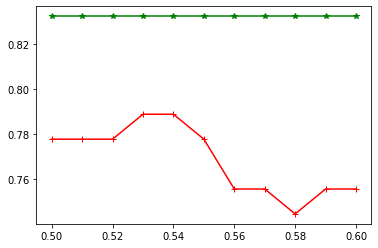

0.7888888888888889


In [79]:
final_predictions1 = (
    0.25 * (models['lr'].predict_proba(test[predictors])[:,1]) +
    0.25 * (models['lgb'].predict_proba(test[predictors])[:,1]) +
    0.1 * (models['xgb'].predict_proba(test[predictors])[:,1]) +
    0.1 * (models['cats'].predict_proba(test[predictors])[:,1])+ 
    0.1 * (models['ada'].predict_proba(test[predictors])[:,1])+
    0.1 * (models['gbm'].predict_proba(test[predictors])[:,1])+
    0.1 * (models['rf'].predict_proba(test[predictors])[:,1])
)
roc=[];acc=[]
thresh =[.5,.51,.52,.53,.54,.55,.56,.57,.58,.59,.6]
for t in thresh:

    final_preds1 = (final_predictions1>=t)*1

    #display(roc_auc_score(test['target>=5'],final_predictions1))
    roc.append(roc_auc_score(test['target>=5'],final_predictions1))
    acc.append(accuracy_score(test['target>=5'],final_preds1))
    #display(accuracy_score(test['target>=5'],final_preds1))
    
plt.plot(thresh,roc,label ='roc',marker='*',color='green')
plt.plot(thresh,acc,label ='acc',marker='+',color='red')
plt.show()
print(max(acc))

In [57]:
roc_auc_score(test['target>=5'],final_predictions1)

0.8325791855203619

In [58]:
accuracy_score(test['target>=5'],final_preds1)

0.7777777777777778

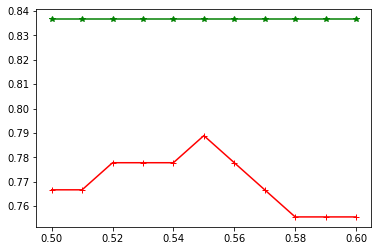

0.7888888888888889


In [80]:
final_predictions1 = (
    0.25 * (models['lr'].predict_proba(test[predictors])[:,1]) +
    0.25 * (models['lgb'].predict_proba(test[predictors])[:,1]) +
    0.2 * (models['xgb'].predict_proba(test[predictors])[:,1]) +
    0.1 * (models['cats'].predict_proba(test[predictors])[:,1])+ 
    0.1 * (models['ada'].predict_proba(test[predictors])[:,1])+
    0.05 * (models['gbm'].predict_proba(test[predictors])[:,1])+
    0.05 * (models['rf'].predict_proba(test[predictors])[:,1])
)
roc=[];acc=[]
thresh =[.5,.51,.52,.53,.54,.55,.56,.57,.58,.59,.6]
for t in thresh:

    final_preds1 = (final_predictions1>=t)*1

    #display(roc_auc_score(test['target>=5'],final_predictions1))
    roc.append(roc_auc_score(test['target>=5'],final_predictions1))
    acc.append(accuracy_score(test['target>=5'],final_preds1))
    #display(accuracy_score(test['target>=5'],final_preds1))
    
plt.plot(thresh,roc,label ='roc',marker='*',color='green')
plt.plot(thresh,acc,label ='acc',marker='+',color='red')
plt.show()
print(max(acc))

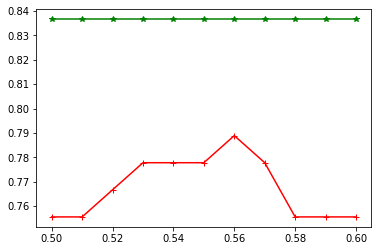

0.7888888888888889


In [81]:
final_predictions1 = (
    0.3 * (models['lr'].predict_proba(test[predictors])[:,1]) +
    0.3 * (models['lgb'].predict_proba(test[predictors])[:,1]) +
    0.2 * (models['xgb'].predict_proba(test[predictors])[:,1]) +
    0.05 * (models['cats'].predict_proba(test[predictors])[:,1])+ 
    0.05 * (models['ada'].predict_proba(test[predictors])[:,1])+
    0.05 * (models['gbm'].predict_proba(test[predictors])[:,1])+
    0.05 * (models['rf'].predict_proba(test[predictors])[:,1])
)
roc=[];acc=[]
for t in thresh:
    final_preds1 = (final_predictions1>=t)*1

    #display(roc_auc_score(test['target>=5'],final_predictions1))
    roc.append(roc_auc_score(test['target>=5'],final_predictions1))
    acc.append(accuracy_score(test['target>=5'],final_preds1))
    #display(accuracy_score(test['target>=5'],final_preds1))
    
plt.plot(thresh,roc,label ='roc',marker='*',color='green')
plt.plot(thresh,acc,label ='acc',marker='+',color='red')
plt.show()
print(max(acc))

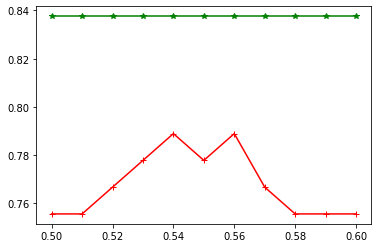

0.7888888888888889


In [82]:
final_predictions1 = (
    0.3 * (models['lr'].predict_proba(test[predictors])[:,1]) +
    0.25 * (models['lgb'].predict_proba(test[predictors])[:,1]) +
    0.25 * (models['xgb'].predict_proba(test[predictors])[:,1]) +
    0.05 * (models['cats'].predict_proba(test[predictors])[:,1])+ 
    0.05 * (models['ada'].predict_proba(test[predictors])[:,1])+
    0.05 * (models['gbm'].predict_proba(test[predictors])[:,1])+
    0.05 * (models['rf'].predict_proba(test[predictors])[:,1])
)
roc=[];acc=[]
for t in thresh:
    final_preds1 = (final_predictions1>=t)*1

    #display(roc_auc_score(test['target>=5'],final_predictions1))
    roc.append(roc_auc_score(test['target>=5'],final_predictions1))
    acc.append(accuracy_score(test['target>=5'],final_preds1))
    #display(accuracy_score(test['target>=5'],final_preds1))
    
plt.plot(thresh,roc,label ='roc',marker='*',color='green')
plt.plot(thresh,acc,label ='acc',marker='+',color='red')
plt.show()
print(max(acc))

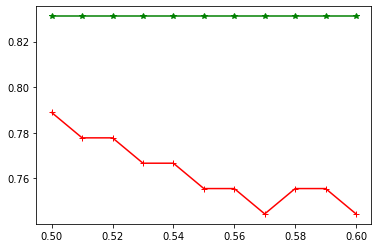

0.7888888888888889


In [83]:
final_predictions1 = (
     (models['lr'].predict_proba(test[predictors])[:,1]) +
    (models['lgb'].predict_proba(test[predictors])[:,1]) +
    (models['xgb'].predict_proba(test[predictors])[:,1]) +
    (models['cats'].predict_proba(test[predictors])[:,1])+ 
    (models['ada'].predict_proba(test[predictors])[:,1])+
     (models['gbm'].predict_proba(test[predictors])[:,1])+
     (models['rf'].predict_proba(test[predictors])[:,1])
)/7
roc=[];acc=[]
for t in thresh:
    final_preds1 = (final_predictions1>=t)*1

    #display(roc_auc_score(test['target>=5'],final_predictions1))
    roc.append(roc_auc_score(test['target>=5'],final_predictions1))
    acc.append(accuracy_score(test['target>=5'],final_preds1))
    #display(accuracy_score(test['target>=5'],final_preds1))
    
plt.plot(thresh,roc,label ='roc',marker='*',color='green')
plt.plot(thresh,acc,label ='acc',marker='+',color='red')
plt.show()
print(max(acc))

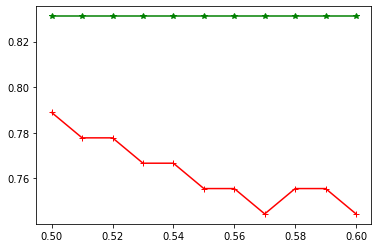

0.7888888888888889


In [84]:
final_predictions1 = (
     (models['lr'].predict_proba(test[predictors])[:,1]) +
    (models['lgb'].predict_proba(test[predictors])[:,1]) +
    (models['xgb'].predict_proba(test[predictors])[:,1]) +
    (models['cats'].predict_proba(test[predictors])[:,1])+ 
    (models['ada'].predict_proba(test[predictors])[:,1])+
     (models['gbm'].predict_proba(test[predictors])[:,1])+
     (models['rf'].predict_proba(test[predictors])[:,1])
)/7
roc=[];acc=[]
for t in thresh:
    final_preds1 = (final_predictions1>=t)*1

    #display(roc_auc_score(test['target>=5'],final_predictions1))
    roc.append(roc_auc_score(test['target>=5'],final_predictions1))
    acc.append(accuracy_score(test['target>=5'],final_preds1))
    #display(accuracy_score(test['target>=5'],final_preds1))
    
plt.plot(thresh,roc,label ='roc',marker='*',color='green')
plt.plot(thresh,acc,label ='acc',marker='+',color='red')
plt.show()
print(max(acc))

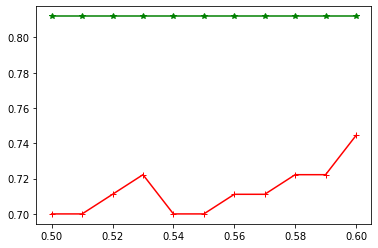

0.7444444444444445


In [85]:
final_predictions1 = (models['lr'].predict_proba(test[predictors])[:,1])
roc=[];acc=[]
for t in thresh:
    final_preds1 = (final_predictions1>=t)*1

    #display(roc_auc_score(test['target>=5'],final_predictions1))
    roc.append(roc_auc_score(test['target>=5'],final_predictions1))
    acc.append(accuracy_score(test['target>=5'],final_preds1))
    #display(accuracy_score(test['target>=5'],final_preds1))
    
plt.plot(thresh,roc,label ='roc',marker='*',color='green')
plt.plot(thresh,acc,label ='acc',marker='+',color='red')
plt.show()
print(max(acc))

0.8119658119658121

0.7444444444444445

Text(0.5, 15.0, 'predicted')

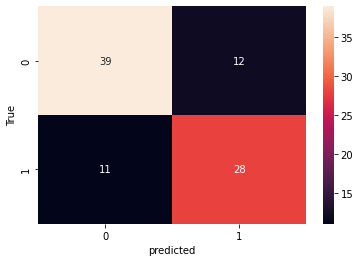

In [65]:
final_predictions1 = (models['lr'].predict_proba(test[predictors])[:,1])
final_preds1 = (final_predictions1>=0.6)*1

display(roc_auc_score(test['target>=5'],final_predictions1))

display(accuracy_score(test['target>=5'],final_preds1))

sns.heatmap(confusion_matrix(test['target>=5'],final_preds1),annot=True)
plt.ylabel('True')
plt.xlabel('predicted')

0.8069381598793364

0.7111111111111111

Text(0.5, 15.0, 'predicted')

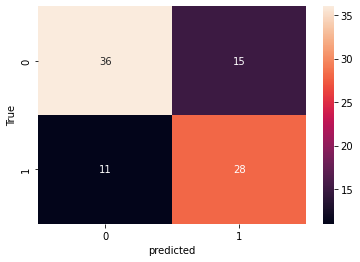

In [66]:
lr_5 =LogisticRegression(C=0.5, solver='liblinear')
lr_5.fit(train[predictors], train['target>=5'])

final_predictions1 = (lr_5.predict_proba(test[predictors])[:,1])
final_preds1 = (final_predictions1>=0.58)*1

display(roc_auc_score(test['target>=5'],final_predictions1))

display(accuracy_score(test['target>=5'],final_preds1))

sns.heatmap(confusion_matrix(test['target>=5'],final_preds1),annot=True)
plt.ylabel('True')
plt.xlabel('predicted')

0.8089492207139266

0.7444444444444445

Text(0.5, 15.0, 'predicted')

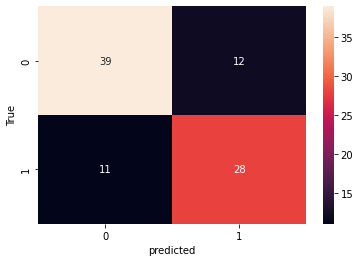

In [67]:
lr_5 =LogisticRegression(C=0.5, solver='liblinear')
lr_5.fit(train[predictors], train['target>=5'])

final_predictions1 = ((lr_5.predict_proba(test[predictors])[:,1]) + (models['lr'].predict_proba(test[predictors])[:,1]))/2
final_preds1 = (final_predictions1>=0.6)*1

display(roc_auc_score(test['target>=5'],final_predictions1))

display(accuracy_score(test['target>=5'],final_preds1))

sns.heatmap(confusion_matrix(test['target>=5'],final_preds1),annot=True)
plt.ylabel('True')
plt.xlabel('predicted')

In [68]:
len(predictors)

21

In [71]:
predictors

['MPpg',
 'PTSpg',
 'FGpg',
 '3Ppg',
 'FTpg',
 'ORBpg',
 'DRBpg',
 'TRBpg',
 'ASTpg',
 'STLpg',
 'BLKpg',
 'TOVpg',
 'PFpg',
 'Age',
 'Year_index',
 'Team_index',
 'FT',
 'FT%',
 'Games',
 'MP',
 'FG%']

In [75]:
team_mapper

{'ATL': 0,
 'BOS': 1,
 'BRK': 2,
 'CHH': 3,
 'CHI': 4,
 'CLE': 5,
 'DAL': 6,
 'DEN': 7,
 'DET': 8,
 'GSW': 9,
 'HOU': 10,
 'IND': 11,
 'LAC': 12,
 'LAL': 13,
 'MEM': 14,
 'MIA': 15,
 'MIL': 16,
 'MIN': 17,
 'NOP': 18,
 'NYK': 19,
 'OKC': 20,
 'ORL': 21,
 'PHI': 22,
 'PHO': 23,
 'POR': 24,
 'SAC': 25,
 'SAS': 26,
 'TOR': 27,
 'UTA': 28,
 'WSH': 29}

In [95]:
train.Age.describe()#.value_counts()#.hist()#describe()

count    2476.000000
mean       22.701535
std         1.897413
min        18.000000
25%        22.000000
50%        23.000000
75%        23.000000
max        35.000000
Name: Age, dtype: float64

In [96]:
np.median(train.Age)

23.0

In [80]:
Thanasis = test.iloc[0].to_dict()

In [86]:
Thanasis 

{'Unnamed: 0': 2458,
 'Player': 'Thanasis Antetokounmpo',
 'Team': 'NYK',
 'Year': 2016,
 'Conf': 'EAST',
 'Age': 23.0,
 'Career': 4.0,
 'Games': 2.0,
 'MP': 6.0,
 'PTS': 6.0,
 'FG': 3.0,
 'FGA': 4.0,
 'FG%': 0.75,
 '3P': 0.0,
 '3PA': 1.0,
 '3P%': 0.0,
 'FT': 0.0,
 'FTA': 0.0,
 'FT%': 0.0,
 'ORB': 0.0,
 'DRB': 1.0,
 'TRB': 1.0,
 'AST': 0.0,
 'STL': 0.0,
 'BLK': 0.0,
 'TOV': 0.0,
 'PF': 2.0,
 'MPpg': 3.0,
 'PTSpg': 3.0,
 'FGpg': 1.5,
 '3Ppg': 0.0,
 'FTpg': 0.0,
 'ORBpg': 0.0,
 'DRBpg': 0.5,
 'TRBpg': 0.5,
 'ASTpg': 0.0,
 'STLpg': 0.0,
 'BLKpg': 0.0,
 'TOVpg': 0.0,
 'PFpg': 1.0,
 'target>=2': 1,
 'target>=3': 1,
 'target>=4': 1,
 'target>=5': 0,
 'Team_index': 19,
 'Year_index': 37}

In [90]:
list(Thanasis)

['Unnamed: 0',
 'Player',
 'Team',
 'Year',
 'Conf',
 'Age',
 'Career',
 'Games',
 'MP',
 'PTS',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'MPpg',
 'PTSpg',
 'FGpg',
 '3Ppg',
 'FTpg',
 'ORBpg',
 'DRBpg',
 'TRBpg',
 'ASTpg',
 'STLpg',
 'BLKpg',
 'TOVpg',
 'PFpg',
 'target>=2',
 'target>=3',
 'target>=4',
 'target>=5',
 'Team_index',
 'Year_index']

In [97]:
2016 -1979

37

In [116]:
test = test.reset_index(drop=True)
test

,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,target>=2,target>=3,target>=4,target>=5,Team_index,Year_index
0,2458,Thanasis Antetokounmpo,NYK,2016,EAST,23.0,4.0,2.0,6.0,6.0,3.0,4.0,0.750,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.00,3.0,1.50,0.00,0.00,0.00,0.50,0.5,0.0,0.00,0.00,0.00,1.00,1,1,1,0,19,37
1,2459,Keith Appling,ORL,2016,EAST,23.0,1.0,5.0,27.0,6.0,2.0,8.0,0.250,0.0,3.0,0.000,2.0,2.0,1.000,0.0,1.0,1.0,1.0,1.0,0.0,3.0,5.0,5.40,1.2,0.40,0.00,0.40,0.00,0.20,0.2,0.2,0.20,0.00,0.60,1.00,0,0,0,0,21,37
2,2464,Rakeem Christmas,IND,2016,EAST,24.0,2.0,1.0,6.0,4.0,2.0,2.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.00,4.0,2.00,0.00,0.00,1.00,0.00,1.0,0.0,0.00,0.00,0.00,1.00,0,0,0,0,11,37
3,2465,Coty Clarke,BOS,2016,EAST,23.0,1.0,3.0,6.0,6.0,2.0,4.0,0.500,2.0,2.0,1.000,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.00,2.0,0.67,0.67,0.00,0.00,0.33,0.3,0.0,0.00,0.00,0.33,0.00,0,0,0,0,1,37
4,2468,Bryce Dejean-Jones,NOP,2016,WEST,23.0,1.0,14.0,279.0,79.0,28.0,69.0,0.406,12.0,32.0,0.375,11.0,21.0,0.524,8.0,40.0,48.0,15.0,10.0,2.0,11.0,17.0,19.93,5.6,2.00,0.86,0.79,0.57,2.86,3.4,1.1,0.71,0.14,0.79,1.21,0,0,0,0,18,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2613,Kyle Wiltjer,HOU,2016,EAST,24.0,1.0,14.0,44.0,13.0,4.0,14.0,0.286,4.0,13.0,0.308,1.0,2.0,0.500,4.0,6.0,10.0,2.0,3.0,1.0,5.0,4.0,3.14,0.9,0.29,0.29,0.07,0.29,0.43,0.7,0.1,0.21,0.07,0.36,0.29,0,0,0,0,10,37
86,2614,Stephen Zimmerman,ORL,2016,EAST,20.0,1.0,19.0,108.0,23.0,10.0,31.0,0.323,0.0,0.0,0.000,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,5.68,1.2,0.53,0.00,0.16,0.58,1.26,1.8,0.2,0.11,0.26,0.16,0.89,0,0,0,0,21,37
87,2615,Paul Zipser,CHI,2016,EAST,22.0,2.0,44.0,843.0,240.0,88.0,221.0,0.398,33.0,99.0,0.333,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,19.16,5.5,2.00,0.75,0.70,0.34,2.50,2.8,0.8,0.34,0.36,0.91,1.77,0,0,0,0,4,37
88,2616,Ivica Zubac,LAL,2016,WEST,19.0,6.0,38.0,609.0,284.0,126.0,238.0,0.529,0.0,3.0,0.000,32.0,49.0,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,16.03,7.5,3.32,0.00,0.84,1.08,3.11,4.2,0.8,0.37,0.87,0.79,1.74,1,1,1,1,13,37


In [117]:
test.iloc[88].to_dict()

{'Unnamed: 0': 2616,
 'Player': 'Ivica Zubac',
 'Team': 'LAL',
 'Year': 2016,
 'Conf': 'WEST',
 'Age': 19.0,
 'Career': 6.0,
 'Games': 38.0,
 'MP': 609.0,
 'PTS': 284.0,
 'FG': 126.0,
 'FGA': 238.0,
 'FG%': 0.529,
 '3P': 0.0,
 '3PA': 3.0,
 '3P%': 0.0,
 'FT': 32.0,
 'FTA': 49.0,
 'FT%': 0.653,
 'ORB': 41.0,
 'DRB': 118.0,
 'TRB': 159.0,
 'AST': 30.0,
 'STL': 14.0,
 'BLK': 33.0,
 'TOV': 30.0,
 'PF': 66.0,
 'MPpg': 16.03,
 'PTSpg': 7.5,
 'FGpg': 3.32,
 '3Ppg': 0.0,
 'FTpg': 0.84,
 'ORBpg': 1.08,
 'DRBpg': 3.11,
 'TRBpg': 4.2,
 'ASTpg': 0.8,
 'STLpg': 0.37,
 'BLKpg': 0.87,
 'TOVpg': 0.79,
 'PFpg': 1.74,
 'target>=2': 1,
 'target>=3': 1,
 'target>=4': 1,
 'target>=5': 1,
 'Team_index': 13,
 'Year_index': 37}

In [69]:
dict_list =[Thanasis,test.iloc[88].to_dict()]

NameError: name 'Thanasis' is not defined

In [129]:
dict_list

[{'Unnamed: 0': 2458,
  'Player': 'Thanasis Antetokounmpo',
  'Team': 'NYK',
  'Year': 2016,
  'Conf': 'EAST',
  'Age': 23.0,
  'Career': 4.0,
  'Games': 2.0,
  'MP': 6.0,
  'PTS': 6.0,
  'FG': 3.0,
  'FGA': 4.0,
  'FG%': 0.75,
  '3P': 0.0,
  '3PA': 1.0,
  '3P%': 0.0,
  'FT': 0.0,
  'FTA': 0.0,
  'FT%': 0.0,
  'ORB': 0.0,
  'DRB': 1.0,
  'TRB': 1.0,
  'AST': 0.0,
  'STL': 0.0,
  'BLK': 0.0,
  'TOV': 0.0,
  'PF': 2.0,
  'MPpg': 3.0,
  'PTSpg': 3.0,
  'FGpg': 1.5,
  '3Ppg': 0.0,
  'FTpg': 0.0,
  'ORBpg': 0.0,
  'DRBpg': 0.5,
  'TRBpg': 0.5,
  'ASTpg': 0.0,
  'STLpg': 0.0,
  'BLKpg': 0.0,
  'TOVpg': 0.0,
  'PFpg': 1.0,
  'target>=2': 1,
  'target>=3': 1,
  'target>=4': 1,
  'target>=5': 0,
  'Team_index': 19,
  'Year_index': 37},
 {'Unnamed: 0': 2616,
  'Player': 'Ivica Zubac',
  'Team': 'LAL',
  'Year': 2016,
  'Conf': 'WEST',
  'Age': 19.0,
  'Career': 6.0,
  'Games': 38.0,
  'MP': 609.0,
  'PTS': 284.0,
  'FG': 126.0,
  'FGA': 238.0,
  'FG%': 0.529,
  '3P': 0.0,
  '3PA': 3.0,
  '3P%': 

In [119]:
pd.DataFrame.from_dict(dict_list)#,index=[0])

,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,target>=2,target>=3,target>=4,target>=5,Team_index,Year_index
0,2458,Thanasis Antetokounmpo,NYK,2016,EAST,23.0,4.0,2.0,6.0,6.0,3.0,4.0,0.750,0.0,1.0,0.0,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.00,3.0,1.50,0.0,0.00,0.00,0.50,0.5,0.0,0.00,0.00,0.00,1.00,1,1,1,0,19,37
1,2616,Ivica Zubac,LAL,2016,WEST,19.0,6.0,38.0,609.0,284.0,126.0,238.0,0.529,0.0,3.0,0.0,32.0,49.0,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,16.03,7.5,3.32,0.0,0.84,1.08,3.11,4.2,0.8,0.37,0.87,0.79,1.74,1,1,1,1,13,37


In [131]:
test.iloc[:2].to_dict()

{'Unnamed: 0': {0: 2458, 1: 2459},
 'Player': {0: 'Thanasis Antetokounmpo', 1: 'Keith Appling'},
 'Team': {0: 'NYK', 1: 'ORL'},
 'Year': {0: 2016, 1: 2016},
 'Conf': {0: 'EAST', 1: 'EAST'},
 'Age': {0: 23.0, 1: 23.0},
 'Career': {0: 4.0, 1: 1.0},
 'Games': {0: 2.0, 1: 5.0},
 'MP': {0: 6.0, 1: 27.0},
 'PTS': {0: 6.0, 1: 6.0},
 'FG': {0: 3.0, 1: 2.0},
 'FGA': {0: 4.0, 1: 8.0},
 'FG%': {0: 0.75, 1: 0.25},
 '3P': {0: 0.0, 1: 0.0},
 '3PA': {0: 1.0, 1: 3.0},
 '3P%': {0: 0.0, 1: 0.0},
 'FT': {0: 0.0, 1: 2.0},
 'FTA': {0: 0.0, 1: 2.0},
 'FT%': {0: 0.0, 1: 1.0},
 'ORB': {0: 0.0, 1: 0.0},
 'DRB': {0: 1.0, 1: 1.0},
 'TRB': {0: 1.0, 1: 1.0},
 'AST': {0: 0.0, 1: 1.0},
 'STL': {0: 0.0, 1: 1.0},
 'BLK': {0: 0.0, 1: 0.0},
 'TOV': {0: 0.0, 1: 3.0},
 'PF': {0: 2.0, 1: 5.0},
 'MPpg': {0: 3.0, 1: 5.4},
 'PTSpg': {0: 3.0, 1: 1.2},
 'FGpg': {0: 1.5, 1: 0.4},
 '3Ppg': {0: 0.0, 1: 0.0},
 'FTpg': {0: 0.0, 1: 0.4},
 'ORBpg': {0: 0.0, 1: 0.0},
 'DRBpg': {0: 0.5, 1: 0.2},
 'TRBpg': {0: 0.5, 1: 0.2},
 'ASTpg': {0:

In [124]:
def predict_single(feature_dict_list,models,predictors):
    #feature_dict['Year_index'] = feature_dict['Year'] - 1979
    #feature_dict['Team_index'] = team_mapper[feature_dict['Team']]
    df = pd.DataFrame.from_dict(feature_dict_list)
    df['Year_index'] = df['Year'] - 1979
    df['Team_index'] = df['Team'].map(team_mapper)
    final_predictions = (
         (models['lr'].predict_proba(df[predictors])[:,1]) +
        (models['lgb'].predict_proba(df[predictors])[:,1]) +
        (models['xgb'].predict_proba(df[predictors])[:,1]) +
        (models['cats'].predict_proba(df[predictors])[:,1])+ 
        (models['ada'].predict_proba(df[predictors])[:,1])+
         (models['gbm'].predict_proba(df[predictors])[:,1])+
         (models['rf'].predict_proba(df[predictors])[:,1])
    )/7
    final_preds = (final_predictions>=0.52)*1
    return final_predictions,final_preds

In [125]:
predict_single(feature_dict_list=dict_list,models=models,predictors=predictors)

(array([0.11916493, 0.87706843]), array([0, 1]))

In [148]:
test[predictors].iloc[0].to_dict()

{'MPpg': 3.0,
 'PTSpg': 3.0,
 'FGpg': 1.5,
 '3Ppg': 0.0,
 'FTpg': 0.0,
 'ORBpg': 0.0,
 'DRBpg': 0.5,
 'TRBpg': 0.5,
 'ASTpg': 0.0,
 'STLpg': 0.0,
 'BLKpg': 0.0,
 'TOVpg': 0.0,
 'PFpg': 1.0,
 'Age': 23.0,
 'Year_index': 37.0,
 'Team_index': 19.0,
 'FT': 0.0,
 'FT%': 0.0,
 'Games': 2.0,
 'MP': 6.0,
 'FG%': 0.75}

In [136]:
726/67

10.835820895522389

In [139]:
67*10.84

726.28

In [138]:
1.01*67

67.67

In [137]:
1.06+1.88

2.94

In [140]:
predictors

['MPpg',
 'PTSpg',
 'FGpg',
 '3Ppg',
 'FTpg',
 'ORBpg',
 'DRBpg',
 'TRBpg',
 'ASTpg',
 'STLpg',
 'BLKpg',
 'TOVpg',
 'PFpg',
 'Age',
 'Year_index',
 'Team_index',
 'FT',
 'FT%',
 'Games',
 'MP',
 'FG%']

In [98]:
data.tail()

,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,target>=2,target>=3,target>=4,target>=5,Team_index,Year_index
2837,2837,Thomas Welsh,DEN,2018,WEST,22.0,1.0,11.0,36.0,18.0,7.0,13.0,0.538,3.0,7.0,0.429,1.0,2.0,0.500,0.0,4.0,4.0,5.0,0.0,0.0,1.0,3.0,3.27,1.6,0.64,0.27,0.09,0.00,0.36,0.4,0.5,0.00,0.00,0.09,0.27,0,0,0,0,7,39
2838,2838,Johnathan Williams,LAL,2018,WEST,23.0,2.0,24.0,372.0,157.0,65.0,110.0,0.591,0.0,2.0,0.000,27.0,48.0,0.563,48.0,51.0,99.0,13.0,8.0,7.0,16.0,62.0,15.50,6.5,2.71,0.00,1.12,2.00,2.12,4.1,0.5,0.33,0.29,0.67,2.58,0,0,0,0,13,39
2839,2839,Kenrich Williams,NOP,2018,WEST,24.0,4.0,46.0,1079.0,279.0,107.0,279.0,0.384,52.0,156.0,0.333,13.0,19.0,0.684,55.0,164.0,219.0,83.0,45.0,19.0,36.0,95.0,23.46,6.1,2.33,1.13,0.28,1.20,3.57,4.8,1.8,0.98,0.41,0.78,2.07,1,1,1,0,18,39
2840,2840,Robert Williams,BOS,2018,EAST,21.0,4.0,32.0,283.0,81.0,36.0,51.0,0.706,0.0,0.0,0.000,9.0,15.0,0.600,27.0,54.0,81.0,7.0,9.0,40.0,10.0,36.0,8.84,2.5,1.12,0.00,0.28,0.84,1.69,2.5,0.2,0.28,1.25,0.31,1.12,1,1,1,0,1,39
2841,2841,Trae Young,ATL,2018,EAST,20.0,4.0,81.0,2503.0,1549.0,525.0,1256.0,0.418,156.0,482.0,0.324,343.0,414.0,0.829,64.0,237.0,301.0,653.0,72.0,15.0,308.0,140.0,30.90,19.1,6.48,1.93,4.23,0.79,2.93,3.7,8.1,0.89,0.19,3.80,1.73,1,1,1,0,0,39


In [150]:
train[train.Year==2003].sort_values('PTSpg',ascending=False)

,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,target>=2,target>=3,target>=4,target>=5,Team_index,Year_index
1584,1584,Carmelo Anthony,DEN,2003,WEST,19.0,19.0,82.0,2995.0,1725.0,624.0,1465.0,0.426,69.0,214.0,0.322,408.0,525.0,0.777,183.0,315.0,498.0,227.0,97.0,41.0,247.0,225.0,36.52,21.0,7.61,0.84,4.98,2.23,3.84,6.1,2.8,1.18,0.50,3.01,2.74,1,1,1,1,7,24
1621,1621,LeBron James,CLE,2003,EAST,19.0,19.0,79.0,3122.0,1654.0,622.0,1492.0,0.417,63.0,217.0,0.290,347.0,460.0,0.754,99.0,333.0,432.0,465.0,130.0,58.0,273.0,149.0,39.52,20.9,7.87,0.80,4.39,1.25,4.22,5.5,5.9,1.65,0.73,3.46,1.89,1,1,1,1,5,24
1647,1647,Dwyane Wade,MIA,2003,EAST,22.0,16.0,61.0,2126.0,991.0,371.0,798.0,0.465,16.0,53.0,0.302,233.0,312.0,0.747,85.0,162.0,247.0,275.0,86.0,34.0,196.0,140.0,34.85,16.2,6.08,0.26,3.82,1.39,2.66,4.0,4.5,1.41,0.56,3.21,2.30,1,1,1,1,15,24
1618,1618,Kirk Hinrich,CHI,2003,EAST,23.0,13.0,76.0,2706.0,915.0,318.0,823.0,0.386,144.0,369.0,0.390,135.0,168.0,0.804,42.0,217.0,259.0,517.0,101.0,21.0,204.0,276.0,35.61,12.0,4.18,1.89,1.78,0.55,2.86,3.4,6.8,1.33,0.28,2.68,3.63,1,1,1,1,4,24
1593,1593,Chris Bosh*,TOR,2003,EAST,19.0,13.0,75.0,2510.0,861.0,327.0,712.0,0.459,5.0,14.0,0.357,202.0,288.0,0.701,191.0,366.0,557.0,78.0,59.0,106.0,107.0,215.0,33.47,11.5,4.36,0.07,2.69,2.55,4.88,7.4,1.0,0.79,1.41,1.43,2.87,1,1,1,1,27,24
1617,1617,Jarvis Hayes,WSH,2003,EAST,22.0,7.0,70.0,2044.0,673.0,278.0,695.0,0.400,40.0,131.0,0.305,77.0,98.0,0.786,71.0,193.0,264.0,106.0,71.0,11.0,110.0,157.0,29.20,9.6,3.97,0.57,1.10,1.01,2.76,3.8,1.5,1.01,0.16,1.57,2.24,1,1,1,1,29,24
1619,1619,Josh Howard,DAL,2003,WEST,23.0,10.0,67.0,1589.0,575.0,229.0,532.0,0.430,20.0,66.0,0.303,97.0,138.0,0.703,149.0,219.0,368.0,97.0,69.0,54.0,67.0,168.0,23.72,8.6,3.42,0.30,1.45,2.22,3.27,5.5,1.4,1.03,0.81,1.00,2.51,1,1,1,1,6,24
1600,1600,Marquis Daniels,DAL,2003,WEST,23.0,10.0,56.0,1039.0,477.0,203.0,411.0,0.494,11.0,36.0,0.306,60.0,78.0,0.769,66.0,80.0,146.0,116.0,53.0,12.0,44.0,51.0,18.55,8.5,3.62,0.20,1.07,1.18,1.43,2.6,2.1,0.95,0.21,0.79,0.91,1,1,1,1,6,24
1586,1586,Leandro Barbosa,PHO,2003,WEST,21.0,14.0,70.0,1500.0,550.0,210.0,470.0,0.447,83.0,210.0,0.395,47.0,61.0,0.770,23.0,100.0,123.0,165.0,93.0,7.0,120.0,184.0,21.43,7.9,3.00,1.19,0.67,0.33,1.43,1.8,2.4,1.33,0.10,1.71,2.63,1,1,1,1,23,24
1616,1616,Udonis Haslem,MIA,2003,EAST,23.0,19.0,75.0,1795.0,550.0,205.0,447.0,0.459,0.0,3.0,0.000,140.0,183.0,0.765,189.0,284.0,473.0,51.0,33.0,24.0,74.0,197.0,23.93,7.3,2.73,0.00,1.87,2.52,3.79,6.3,0.7,0.44,0.32,0.99,2.63,1,1,1,1,15,24
